In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import linregress
import datetime as dt 
# import seaborn as sns

In [2]:
main_data = pd.read_csv("Resources/netflix_titles.csv")

In [3]:
#Drop unnecessary columns
main_data_cleaned = main_data.drop(['description', 'duration','director','cast'], axis = 1)
main_data_cleaned

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,Dramas
...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,"Dramas, International Movies, Music & Musicals"
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,"Documentaries, International Movies, Music & M..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,"International TV Shows, Reality TV"


# Country

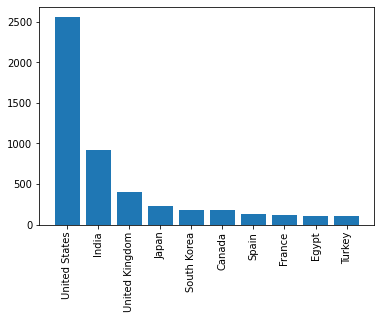

In [4]:
# JUST LEAVE IT
# Pull out the list of genres
country_index_list = main_data_cleaned['country'].value_counts().index.tolist()

# Pull out the value of genres
country_value_list = main_data_cleaned['country'].value_counts().tolist()

plt.bar(country_index_list[0:10], country_value_list[0:10])
plt.xticks(rotation = 90)
plt.show()

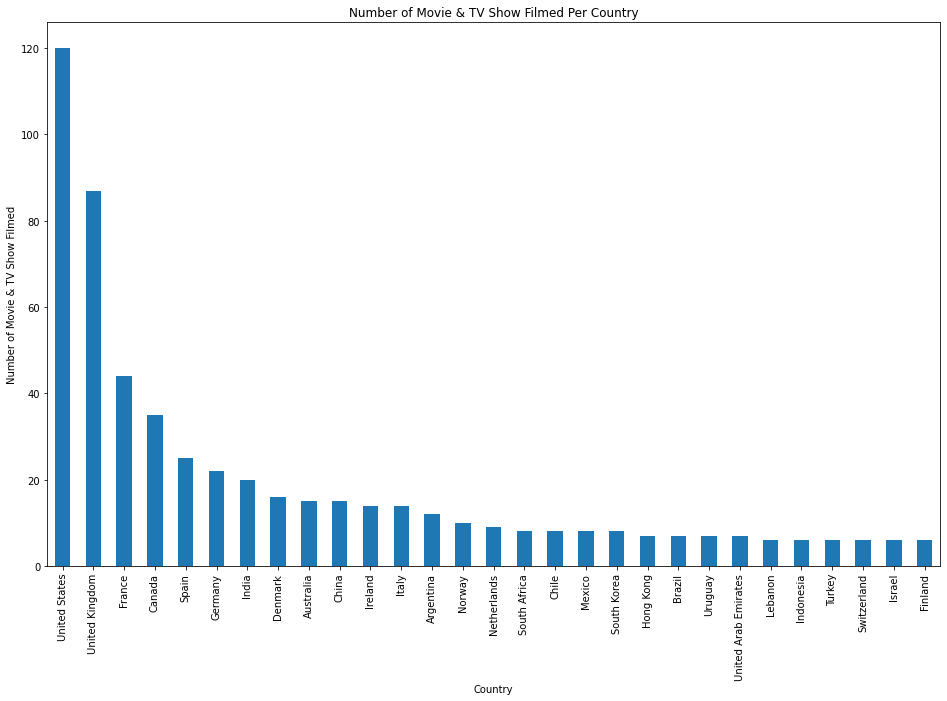

In [5]:
# OPTION FIRST

# Pull out the list of genres
country_index_list = main_data_cleaned['country'].value_counts().index.tolist()

# Pull out the value of genres
country_value_list = main_data_cleaned['country'].value_counts().tolist()

counter = 0
country_dict = {}
for countries in country_index_list:
    country = countries.split(",")[0]
    if country not in country_dict.keys():
        country_dict[country] = 0
    country_dict[country] += 1
    
key = list(country_dict.keys())
value = list(country_dict.values())
df_dict = {'countries': key,
       'values': value}
df_dict

# TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

countries_df = pd.DataFrame(df_dict)
renamed_countries_df = countries_df.set_index('countries')
sorted_countries_df = renamed_countries_df.sort_values(by='values', ascending=False)
top_countries_df = sorted_countries_df.loc[sorted_countries_df['values'] > 5]
top_countries_df.plot(kind='bar', figsize=(16,10), xlabel = 'Country', ylabel='Number of Movie & TV Show Filmed', legend=None)
plt.title("Number of Movie & TV Show Filmed Per Country")

plt.show()

# Movies & TV Shows

In [6]:
movie_df = main_data_cleaned.loc[main_data_cleaned["type"] == "Movie"]
tvshow_df = main_data_cleaned.loc[main_data_cleaned["type"] == "TV Show"]
len(movie_df)

5377

## Movies Genres

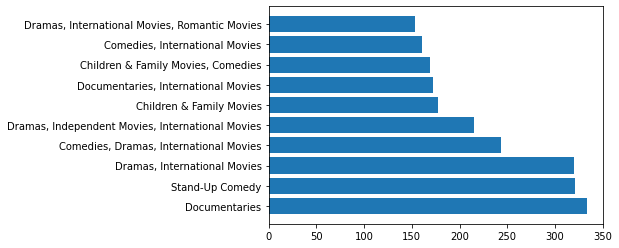

In [8]:
# LEAVE IT
# OPTION TOTAL

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

plt.barh(movie_genres_index_list[0:10], movie_genres_value_list[0:10])
plt.xticks(rotation = 0)
plt.show()

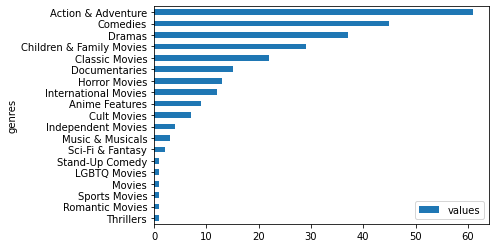

In [11]:
# OPTION FIRST

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

counter = 0
genres_dict = {}
for genres in movie_genres_index_list:
    genre = genres.split(",")[0]
    if genre not in genres_dict.keys():
        genres_dict[genre] = 0
    genres_dict[genre] += 1
    counter += 1
# genres_dict
# for (key, value) in genres_dict.items():
#     genres_dict[key] = [value]
    
key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}
df_dict

# TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh')
plt.show()

In [10]:
# LEAVE IT
# OPTION SPLIT

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()


# 
counter = 0
genres_dict = {}

for genres_row in movie_genres_index_list:
    genres = genres_row.split(", ")

    for genre in genres:
        if genre not in genres_dict.keys():
            genres_dict[genre] = 0
        genres_dict[genre] += 1
    
    

key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}

total = 0
for (key, value) in genres_dict.items():
    total += value
total
# counter

# genres_df = pd.DataFrame(df_dict)
# renamed_genres_df = genres_df.set_index('genres')
# sorted_genres_df = renamed_genres_df.sort_values(by='values')
# sorted_genres_df.plot(kind='barh')
# plt.show()

693

## TV Shows Genres

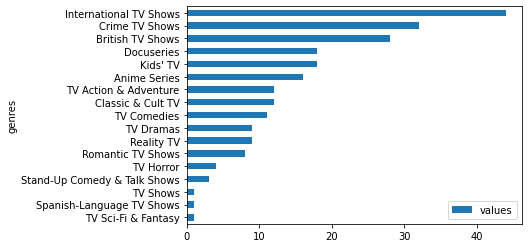

In [12]:
# OPTION FIRST

# Pull out the list of genres
tvshow_genres_index_list = tvshow_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
tvshow_genres_value_list = tvshow_df['listed_in'].value_counts().tolist()



genres_dict = {}
for genres in tvshow_genres_index_list:
    genre = genres.split(",")[0]
    if genre not in genres_dict.keys():
        genres_dict[genre] = 0
    genres_dict[genre] += 1
# genres_dict
# for (key, value) in genres_dict.items():
#     genres_dict[key] = [value]
    
key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}
df_dict

# # TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh')
plt.show()

In [13]:
# LEAVE IT
# Extract only year from date_added 
main_data_cleaned["added_year"]= main_data_cleaned["date_added"].str.split(",").str[1]
main_data_cleaned

# df['year'] =drop_columns_main_data['date_added'].dt.year
# df['V'] = df['V'].str.split('-').str[0]

main_data_cleaned['listed_in'].value_counts()[main_data_cleaned['listed_in'].value_counts() != 1]

Documentaries                                           334
Stand-Up Comedy                                         321
Dramas, International Movies                            320
Comedies, Dramas, International Movies                  243
Dramas, Independent Movies, International Movies        215
                                                       ... 
International TV Shows, Reality TV, TV Comedies           2
Children & Family Movies, Independent Movies              2
Classic Movies, Comedies, Independent Movies              2
Comedies, Cult Movies, International Movies               2
Horror Movies, International Movies, Romantic Movies      2
Name: listed_in, Length: 349, dtype: int64

In [ ]:
# LEAVE IT
main_data_cleaned['country'].value_counts()